# Regression Analysis


In [ ]:
!pip install statsmodels
!pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59220 sha256=4c91da2701c536179f7e820d4915a7596eebb2ac18875095ab6e8f228865e997
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from bioinfokit.analys import stat
from bioinfokit import visuz

In [ ]:
def make_box(df, x_var):
    fig = px.box(df,
                 x=x_var
                )
    fig.show()

In [ ]:
def make_scatter(df, x_var, y_var):
    fig = px.scatter(df,
                 x=x_var,
                 y=y_var,
                 trendline="ols"
                )
    fig.show()

In [ ]:
def remove_outliers_iqr(df, column):
    """Removes outliers from a DataFrame column using the IQR method."""

    # Calculate quantiles and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

In [ ]:
def replace_nulls_median(df, column):
    """Replaces null values in a DataFrame column with the median value."""

    # Calculate median
    median = df[column].median()

    # Replace null values
    df[column] = df[column].fillna(median)

    return df

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X_temp = auto_mpg.data.features
y_temp = auto_mpg.data.targets

# metadata
print(auto_mpg.metadata)

# variable information
print(auto_mpg.variables)

{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [ ]:
df = pd.concat([X_temp, y_temp], axis=1)
df

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1,27.0
394,97.0,4,52.0,2130,24.6,82,2,44.0
395,135.0,4,84.0,2295,11.6,82,1,32.0
396,120.0,4,79.0,2625,18.6,82,1,28.0


In [ ]:
print(df.isnull().sum())

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64


In [ ]:
# Replace null values with median value of column

df = df.copy()
for column in df.columns:
    df = replace_nulls_median(df, column)

In [ ]:
print(df.isnull().sum())

displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64


In [ ]:
# Using box plots to identify outliers in each feature of df

make_box(df, 'displacement')

In [ ]:
make_box(df, 'cylinders')

In [ ]:
make_box(df, 'horsepower')

In [ ]:
make_box(df, 'weight')

In [ ]:
make_box(df, 'acceleration')

In [ ]:
make_box(df, 'model_year')

In [ ]:
make_box(df, 'origin')

In [ ]:
make_box(df, 'mpg')

In [ ]:
# First pass of custom function to remove outliers of each feature

df_clean = df.copy()
for column in df_clean.columns:
    df_clean = remove_outliers_iqr(df_clean, column)

In [ ]:
# Second pass of custom function to remove additional outliers

df_final = df_clean.copy()
for column in df_final.columns:
    df_final = remove_outliers_iqr(df_final, column)

In [ ]:
# Box plots after outliers have been removed

make_box(df_final, 'displacement')

In [ ]:
make_box(df_final, 'cylinders')

In [ ]:
# Removing additional outliers from Horsepower causes more outliers to appear, so after two rounds of removing outliers it was decided to keep and proceed with the 3 outliers shown

make_box(df_final, 'horsepower')

In [ ]:
make_box(df_final, 'weight')

In [ ]:
make_box(df_final, 'acceleration')

In [ ]:
make_box(df_final, 'model_year')

In [ ]:
make_box(df_final, 'origin')

In [ ]:
make_box(df_final, 'mpg')

In [ ]:
df_final.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,179.519178,5.279452,97.920548,2871.791781,15.781370,76.290411,1.608219,24.130411
std,91.565638,1.611681,29.141244,776.441312,2.406044,3.597625,0.817016,7.341417
min,68.000000,3.000000,46.000000,1613.000000,9.500000,70.000000,1.000000,11.000000
25%,98.000000,4.000000,75.000000,2205.000000,14.000000,73.000000,1.000000,18.000000
50%,140.000000,4.000000,90.000000,2720.000000,15.500000,76.000000,1.000000,23.800000
75%,250.000000,6.000000,110.000000,3425.000000,17.300000,79.000000,2.000000,29.800000
max,400.000000,8.000000,170.000000,4997.000000,22.200000,82.000000,3.000000,44.600000


In [ ]:
X = df_final.drop('mpg', axis=1)
y = df_final['mpg']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split (X, y, test_size=0.3, random_state=0)

In [ ]:
# Initial regression summary

import statsmodels.api as sm

X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     233.6
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          4.25e-129
Time:                        17:40:15   Log-Likelihood:                -931.29
No. Observations:                 365   AIC:                             1879.
Df Residuals:                     357   BIC:                             1910.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -12.0740      4.589     -2.631      0.009     -21.099      -3.049
displacement     0.0070      0.009      0.807      0.420      -0.010       0.024
cylinders        0.2566      0.355      0.723      0.470      -0.441       0.954
horsepower      -0.0537      0.018     -3.046      0.002      -0.088      -0.019
weight          -0.0060      0.001     -7.886      0.000      -0.008      -0.005
acceleration    -0.1322      0.110     -1.199      0.232      -0.349       0.085
model_year       0.7387      0.049     15.136      0.000       0.643       0.835
origin           1.1485      0.265      4.330      0.000       0.627       1.670
==============================================================================
Omnibus:                       16.899   Durbin-Watson:                   1.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.658
Skew:                           0.368   Prob(JB):                     7.29e-06
Kurtosis:                       4.007   Cond. No.                     8.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Final multivariate regression results
# Displacement, cylinders, and acceleration columns had P>0.05 so I dropped those column and reouput the regression training, testing, and summary

X_new = X.drop(['displacement','cylinders', 'acceleration'], axis=1, inplace=False)

Xtrain, Xtest, ytrain, ytest = train_test_split (X_new, y, test_size=0.3, random_state=0)

X_new = sm.add_constant(X_new)

reg = sm.OLS(y, X_new).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     402.5
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          2.01e-131
Time:                        18:49:55   Log-Likelihood:                -934.86
No. Observations:                 365   AIC:                             1880.
Df Residuals:                     360   BIC:                             1899.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.4230      3.936     -3.664      0.000     -22.164      -6.682
horsepower    -0.0281      0.012     -2.376      0.018      -0.051      -0.005
weight        -0.0056      0.000    -11.816      0.000      -0.007      -0.005
model_year     0.7305      0.048     15.097      0.000       0.635       0.826
origin         0.9883      0.248      3.983      0.000       0.500       1.476
==============================================================================
Omnibus:                       18.140   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.548
Skew:                           0.389   Prob(JB):                     2.83e-06
Kurtosis:                       4.037   Cond. No.                     7.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression equation of final multivariate regression model

y = -0.028(x1) - 0.006(x2) + -.73(x3) + 0.988(x4) - 14.423

# Interpretation of Model

Based on the R-squared value of 0.817 and the Adjusted R-squared value of 0.815, this model can performs well and consistently when predicting MPG. I would consider this level of permormance to be reasonable. The equation shows that horsepower and weight have a negative relationship with MPS, so as they increase, MPG will likewise decrease. Model Year and Origin on the other hand have a positive relationship with MPG, so as they increase, MPG also increases.


In [ ]:
X_new.describe()

,const,horsepower,weight,model_year,origin
count,365.0,365.000000,365.000000,365.000000,365.000000
mean,1.0,97.920548,2871.791781,76.290411,1.608219
std,0.0,29.141244,776.441312,3.597625,0.817016
min,1.0,46.000000,1613.000000,70.000000,1.000000
25%,1.0,75.000000,2205.000000,73.000000,1.000000
50%,1.0,90.000000,2720.000000,76.000000,1.000000
75%,1.0,110.000000,3425.000000,79.000000,2.000000
max,1.0,170.000000,4997.000000,82.000000,3.000000


In [ ]:
df_remerged = pd.concat([X_new, y], axis=1)
df_remerged

,const,horsepower,weight,model_year,origin,mpg
0,1.0,130.0,3504,70,1,18.0
1,1.0,165.0,3693,70,1,15.0
2,1.0,150.0,3436,70,1,18.0
3,1.0,150.0,3433,70,1,16.0
4,1.0,140.0,3449,70,1,17.0
...,...,...,...,...,...,...
392,1.0,90.0,2950,82,1,27.0
393,1.0,86.0,2790,82,1,27.0
395,1.0,84.0,2295,82,1,32.0
396,1.0,79.0,2625,82,1,28.0


In [ ]:
make_scatter(df_remerged, 'horsepower', 'mpg')

In [ ]:
make_scatter(df_remerged, 'weight', 'mpg')

In [ ]:
make_scatter(df_remerged, 'model_year', 'mpg')

In [ ]:
make_scatter(df_remerged, 'origin', 'mpg')

# Heatmaps that show the correlation between features

In [ ]:
df_merged.corr()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
displacement,1.000000,0.950721,0.897257,0.932824,-0.543684,-0.370164,-0.609409,-0.804203
cylinders,0.950721,1.000000,0.842983,0.896017,-0.505419,-0.348746,-0.562543,-0.775396
horsepower,0.897257,0.842983,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.778427
weight,0.932824,0.896017,0.864538,1.000000,-0.417457,-0.306564,-0.581024,-0.831741
acceleration,-0.543684,-0.505419,-0.689196,-0.417457,1.000000,0.288137,0.205873,0.420289
model_year,-0.370164,-0.348746,-0.416361,-0.306564,0.288137,1.000000,0.180662,0.579267
origin,-0.609409,-0.562543,-0.455171,-0.581024,0.205873,0.180662,1.000000,0.563450
mpg,-0.804203,-0.775396,-0.778427,-0.831741,0.420289,0.579267,0.563450,1.000000


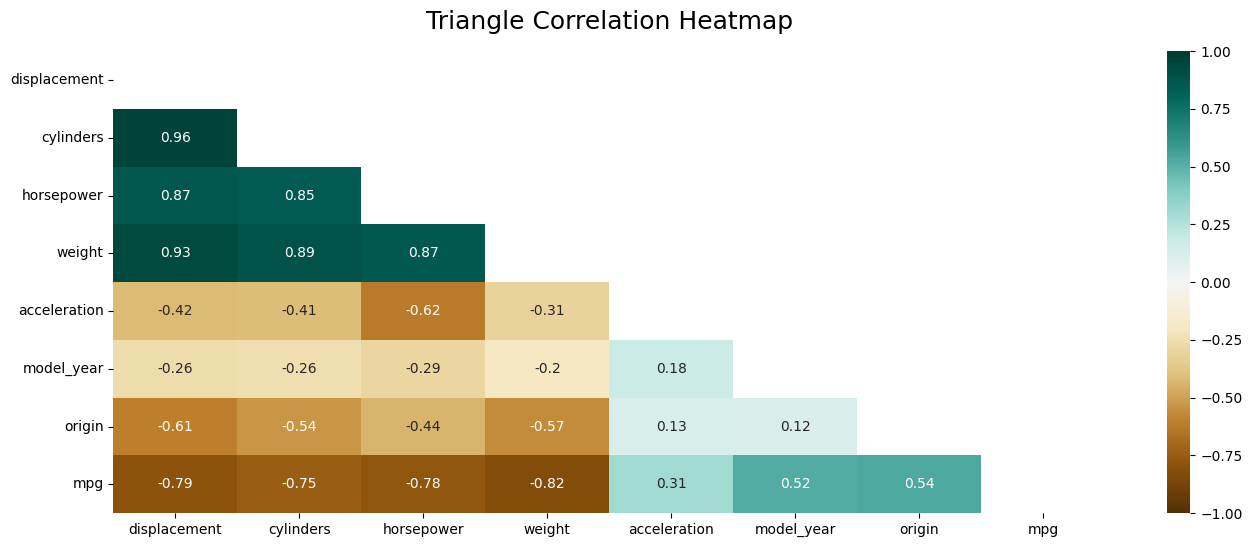

In [ ]:
# Triangle heatmap that shows correlation between all features

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_final.corr(), dtype=bool))
heatmap = sns.heatmap(df_final.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

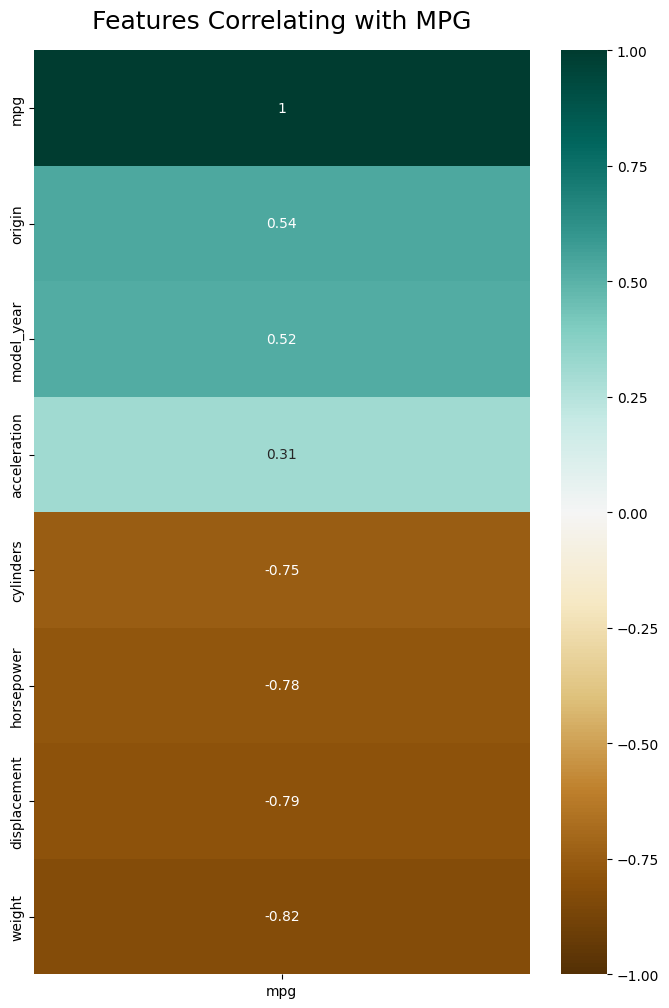

In [ ]:
# Vertical heatmap that shows of indepenent variables and dependent variable

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_final.corr()[['mpg']].sort_values(by='mpg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with MPG', fontdict={'fontsize':18}, pad=16);

In [ ]:
X_hp = X_new['horsepower']
X_w = X_new['weight']
X_my = X_new['model_year']

In [ ]:
X_w = sm.add_constant(X_w)

reg = sm.OLS(y, X_w).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     751.2
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           2.03e-90
Time:                        18:52:10   Log-Likelihood:                -1040.4
No. Observations:                 365   AIC:                             2085.
Df Residuals:                     363   BIC:                             2093.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.4259      0.843     55.098      0.000      44.769      48.083
weight        -0.0078      0.000    -27.408      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       23.917   Durbin-Watson:                   0.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.986
Skew:                           0.578   Prob(JB):                     8.37e-07
Kurtosis:                       3.710   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression Model Equation for Weight

y = -0.008(x) + 46.426

# Interpretation of Model

Based on the R-squared value of 0.674 and the Adjusted R-squared value of 0.673, this model does a reasonable but imperfect job of predicting MPG. It is the independent feature that best predicts MPG, but it still performs worse the multivariate model.

In [ ]:
res= stat()
res.reg_metric(y=np.array(y), yhat=np.array(reg.predict(X_w)), resid=np.array(reg.resid))
res.reg_metric_df

,Metrics,Value
0,Root Mean Square Error (RMSE),3099.1881
1,Mean Squared Error (MSE),39.0332
2,Mean Absolute Error (MAE),2984.8818
3,Mean Absolute Percentage Error (MAPE),146.6500


In [ ]:
X_hp = sm.add_constant(X_hp)

reg = sm.OLS(y, X_hp).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     546.6
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           2.09e-74
Time:                        18:52:21   Log-Likelihood:                -1077.4
No. Observations:                 365   AIC:                             2159.
Df Residuals:                     363   BIC:                             2167.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.2536      0.853     50.691      0.000      41.576      44.932
horsepower    -0.1953      0.008    -23.380      0.000      -0.212      -0.179
==============================================================================
Omnibus:                       10.131   Durbin-Watson:                   0.974
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.012
Skew:                           0.324   Prob(JB):                      0.00406
Kurtosis:                       3.553   Cond. No.                         359.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regression Model Equation for Horsepower

y = -0.195(x) + 46.254

# Interpretation of Model

With an R-squared value of 0.601 and Adjusted R-squared value of 0.600, this model performs fairly well but the effectiveness of the model is slightly behind the model that uses weight and even further behind the multivariate model.

In [ ]:
res= stat()

res.reg_metric(y=np.array(y), yhat=np.array(reg.predict(sm.add_constant(X_hp))), resid=np.array(reg.resid))
res.reg_metric_df

,Metrics,Value
0,Root Mean Square Error (RMSE),43.6561
1,Mean Squared Error (MSE),39.0332
2,Mean Absolute Error (MAE),32.8631
3,Mean Absolute Percentage Error (MAPE),1.8190


In [ ]:
X_my = sm.add_constant(X_my)

reg = sm.OLS(y, X_my).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     136.9
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           4.82e-27
Time:                        18:52:33   Log-Likelihood:                -1186.7
No. Observations:                 365   AIC:                             2377.
Df Residuals:                     363   BIC:                             2385.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -57.3283      6.971     -8.224      0.000     -71.037     -43.620
model_year     1.0677      0.091     11.698      0.000       0.888       1.247
==============================================================================
Omnibus:                       27.189   Durbin-Watson:                   0.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.068
Skew:                           0.265   Prob(JB):                      0.00145
Kurtosis:                       2.239   Cond. No.                     1.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression Model Equation for Model Year

y = 0.091(x) + 57.328

# Interpretation of Model

An R-squared value of 0.274 and an Adjusted R-squared value of 0.272 indicates that model year on its own is not a very good feature to use to predict MPG.

In [ ]:
res= stat()

res.reg_metric(y=np.array(y), yhat=np.array(reg.predict(sm.add_constant(X_my))), resid=np.array(reg.resid))
res.reg_metric_df

,Metrics,Value
0,Root Mean Square Error (RMSE),6.2477
1,Mean Squared Error (MSE),39.0332
2,Mean Absolute Error (MAE),5.3070
3,Mean Absolute Percentage Error (MAPE),0.2432


# Visualizing Feature Relationships with Line Charts

In [ ]:
fig = px.line(df_remerged.groupby('model_year')['mpg'].mean().reset_index(),
             x='model_year',
             y='mpg',
             title = 'Average MPG by Model Year'
            )
fig.show()

In [ ]:
fig = px.line(X_new.groupby('model_year')['horsepower'].mean().reset_index(),
             x='model_year',
             y='horsepower',
             title='Average Horsepower by Model Year'
             )
fig.show()

In [ ]:
fig = px.line(df_remerged.groupby('model_year')['weight'].mean().reset_index(),
             x='model_year',
             y='weight',
             title = 'Average Weight by Model Year'
            )
fig.show()